# Parte 1: AED

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\luisP\Downloads\Hackaton-data\Online_Retail.csv", encoding='unicode_escape')

In [4]:
df.sample(10)

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
531342,580916,84661C,PINK SQUARE TABLE CLOCK,1,06/12/2020 13:45,0.79,13685.0,United Kingdom
478782,577106,21211,SET OF 72 SKULL PAPER DOILIES,1,17/11/2020 17:18,1.45,14456.0,United Kingdom
178916,552247,21773,DECORATIVE ROSE BATHROOM BOTTLE,2,06/05/2020 19:48,1.25,12748.0,United Kingdom
157642,550209,21731,RED TOADSTOOL LED NIGHT LIGHT,2,15/04/2020 10:39,4.13,NaN,United Kingdom
162878,550521,21975,PACK OF 60 DINOSAUR CAKE CASES,24,19/04/2020 09:49,0.55,13647.0,United Kingdom
74995,C542537,22195,LARGE HEART MEASURING SPOONS,-1,28/01/2020 13:54,1.65,12501.0,Germany
518795,580119,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,01/12/2020 16:37,1.95,17920.0,United Kingdom
389433,570467,21210,SET OF 72 RETROSPOT PAPER DOILIES,12,10/10/2020 16:06,1.45,12607.0,USA
283353,561710,22171,3 HOOK PHOTO SHELF ANTIQUE WHITE,1,29/07/2020 11:45,8.50,13827.0,United Kingdom
103919,545082,21689,SILVER VANILLA FLOWER CANDLE POT,4,28/02/2020 10:37,3.75,16992.0,United Kingdom


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   INVOICE_NO    541909 non-null  object 
 1   STOCK_CODE    541909 non-null  object 
 2   DESCRIPTION   540455 non-null  object 
 3   QUANTITY      541909 non-null  int64  
 4   INVOICE_DATE  541909 non-null  object 
 5   UNIT_PRICE    541909 non-null  float64
 6   CUSTOMER_ID   406829 non-null  float64
 7   REGION        541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df['CUSTOMER_ID'] = df['CUSTOMER_ID'].astype(object)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
QUANTITY,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UNIT_PRICE,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0


In [8]:
df.select_dtypes('object').describe().T

,count,unique,top,freq
INVOICE_NO,541909,25900,573585,1114
STOCK_CODE,541909,4070,85123A,2313
DESCRIPTION,540455,4214,WHITE HANGING HEART T-LIGHT HOLDER,2369
INVOICE_DATE,541909,23260,31/10/2020 14:41,1114
CUSTOMER_ID,406829.0,4372.0,17841.0,7983.0
REGION,541909,38,United Kingdom,495478


In [10]:
df['DESCRIPTION'].fillna('unknown', inplace=True)

C:\Users\luisP\AppData\Local\Temp\ipykernel_8344\1782370504.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DESCRIPTION'].fillna('unknown', inplace=True)


In [22]:
df[df['DESCRIPTION']=='unknown']

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
622,536414,22139,unknown,56,2019-12-01 11:52:00,0.0,unknown,United Kingdom
1970,536545,21134,unknown,1,2019-12-01 14:32:00,0.0,unknown,United Kingdom
1971,536546,22145,unknown,1,2019-12-01 14:33:00,0.0,unknown,United Kingdom
1972,536547,37509,unknown,1,2019-12-01 14:33:00,0.0,unknown,United Kingdom
1987,536549,85226A,unknown,1,2019-12-01 14:34:00,0.0,unknown,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,unknown,-2,2020-12-07 18:26:00,0.0,unknown,United Kingdom
535326,581203,23406,unknown,15,2020-12-07 18:31:00,0.0,unknown,United Kingdom
535332,581209,21620,unknown,6,2020-12-07 18:35:00,0.0,unknown,United Kingdom
536981,581234,72817,unknown,27,2020-12-08 10:33:00,0.0,unknown,United Kingdom


In [11]:
df[df['CUSTOMER_ID'].isna()]

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
622,536414,22139,unknown,56,01/12/2019 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,01/12/2019 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,01/12/2019 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,01/12/2019 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,01/12/2019 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,09/12/2020 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,09/12/2020 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,09/12/2020 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,09/12/2020 10:26,10.79,NaN,United Kingdom


In [12]:
df['CUSTOMER_ID'].fillna('unknown', inplace=True)

C:\Users\luisP\AppData\Local\Temp\ipykernel_8344\387019857.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CUSTOMER_ID'].fillna('unknown', inplace=True)


In [13]:
df.isna().sum()

INVOICE_NO      0
STOCK_CODE      0
DESCRIPTION     0
QUANTITY        0
INVOICE_DATE    0
UNIT_PRICE      0
CUSTOMER_ID     0
REGION          0
dtype: int64

In [14]:
df['INVOICE_DATE'] = pd.to_datetime(df['INVOICE_DATE'], format="%d/%m/%Y %H:%M")

In [15]:
df['INVOICE_DATE']

0        2019-12-01 08:26:00
1        2019-12-01 08:26:00
2        2019-12-01 08:26:00
3        2019-12-01 08:26:00
4        2019-12-01 08:26:00
                 ...        
541904   2020-12-09 12:50:00
541905   2020-12-09 12:50:00
541906   2020-12-09 12:50:00
541907   2020-12-09 12:50:00
541908   2020-12-09 12:50:00
Name: INVOICE_DATE, Length: 541909, dtype: datetime64[ns]

In [16]:
datos_negativos = df[df['QUANTITY'] < 1]['QUANTITY']

(array([2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00, 1.0618e+04]),
 array([-8.09950e+04, -7.28956e+04, -6.47962e+04, -5.66968e+04,
        -4.85974e+04, -4.04980e+04, -3.23986e+04, -2.42992e+04,
        -1.61998e+04, -8.10040e+03, -1.00000e+00]),
 <BarContainer object of 10 artists>)

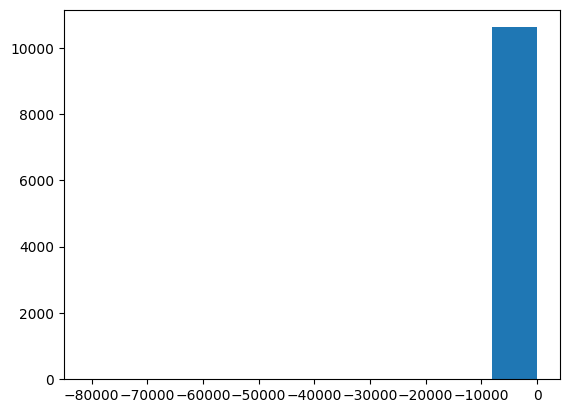

In [17]:
plt.hist(datos_negativos)

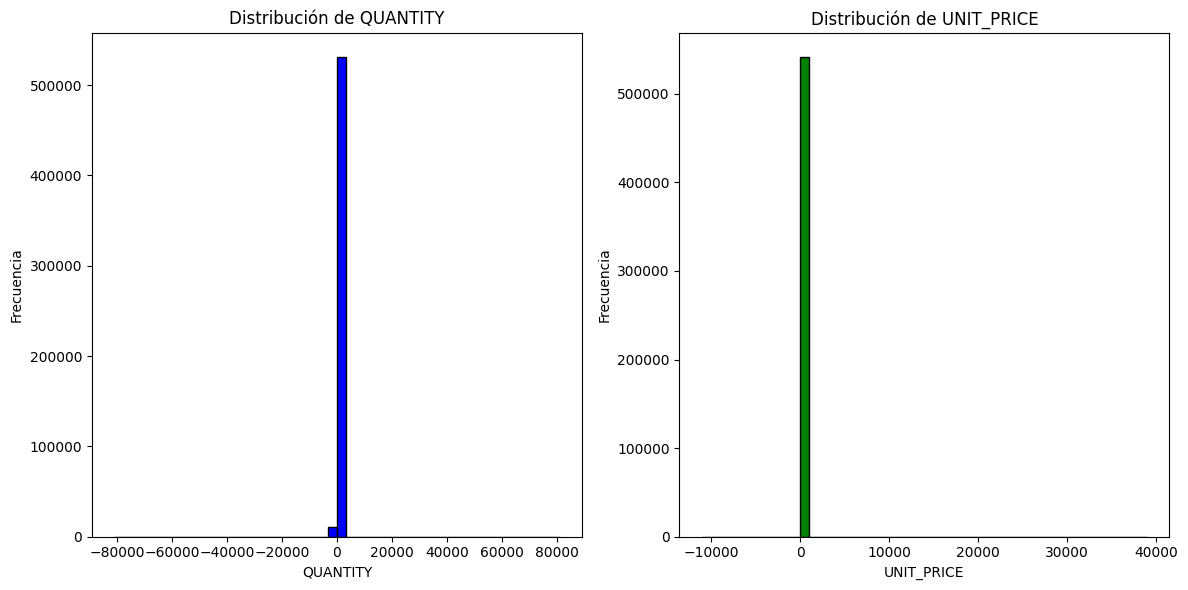

In [18]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['QUANTITY'], bins=50, color='blue', edgecolor='black')
plt.title('Distribución de QUANTITY')
plt.xlabel('QUANTITY')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(df['UNIT_PRICE'], bins=50, color='green', edgecolor='black')
plt.title('Distribución de UNIT_PRICE')
plt.xlabel('UNIT_PRICE')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

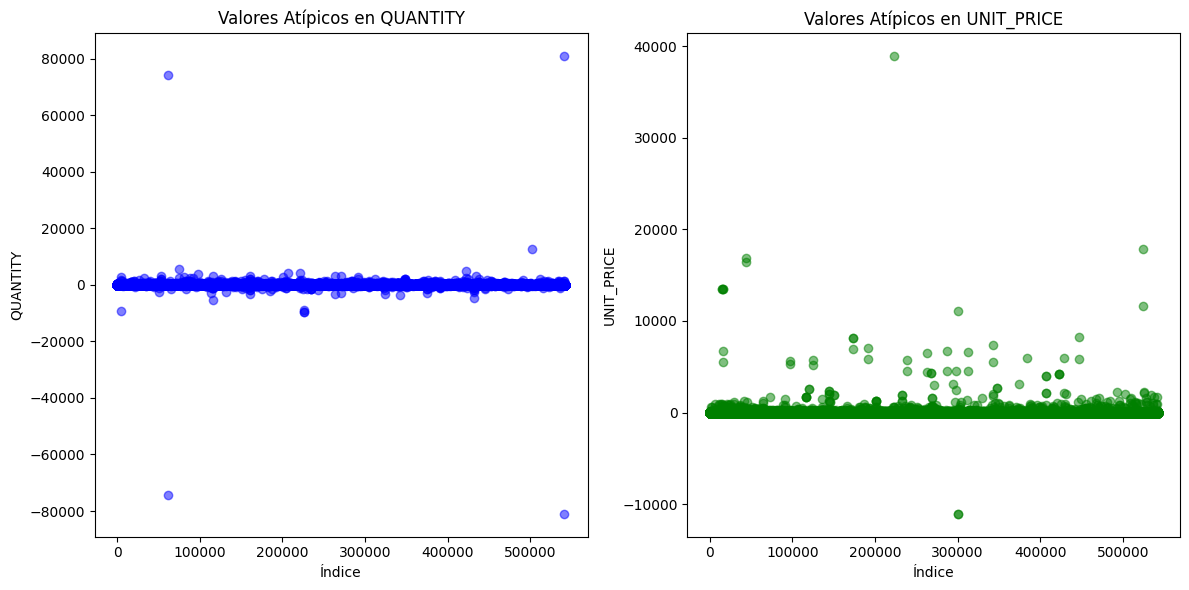

In [19]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(range(len(df)), df['QUANTITY'], alpha=0.5, color='blue')
plt.title('Valores Atípicos en QUANTITY')
plt.xlabel('Índice')
plt.ylabel('QUANTITY')

plt.subplot(1, 2, 2)
plt.scatter(range(len(df)), df['UNIT_PRICE'], alpha=0.5, color='green')
plt.title('Valores Atípicos en UNIT_PRICE')
plt.xlabel('Índice')
plt.ylabel('UNIT_PRICE')

plt.tight_layout()
plt.show()

In [20]:
df[df['QUANTITY'] < -2000]

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2019-12-02 14:23:00,0.03,15838.0,United Kingdom
50849,540564,22617,mouldy thrown away.,-2600,2020-01-10 10:36:00,0.00,unknown,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2020-01-18 10:17:00,1.04,12346.0,United Kingdom
113580,545990,84598,check,-3000,2020-03-08 13:07:00,0.00,unknown,United Kingdom
115818,546152,72140F,throw away,-5368,2020-03-09 17:25:00,0.00,unknown,United Kingdom
131399,547560,72732,thrown away-can't sell,-2472,2020-03-23 17:28:00,0.00,unknown,United Kingdom
160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2020-04-18 13:08:00,2.10,15749.0,United Kingdom
185113,552733,23059,Thrown away-rusty,-2376,2020-05-11 10:48:00,0.00,unknown,United Kingdom
225528,556687,23003,Printing smudges/thrown away,-9058,2020-06-14 10:36:00,0.00,unknown,United Kingdom
225529,556690,23005,printing smudges/thrown away,-9600,2020-06-14 10:37:00,0.00,unknown,United Kingdom


In [36]:
df[df['QUANTITY'] > 3000]

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2020-01-11 12:55:00,2.10,15749.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2020-01-18 10:01:00,1.04,12346.0,United Kingdom
74614,542504,37413,unknown,5568,2020-01-28 12:03:00,0.00,unknown,United Kingdom
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2020-02-22 10:43:00,0.82,18087.0,United Kingdom
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2020-04-18 13:20:00,2.10,15749.0,United Kingdom
206121,554868,22197,SMALL POPCORN HOLDER,4300,2020-05-27 10:52:00,0.72,13135.0,United Kingdom
220843,556231,85123A,unknown,4000,2020-06-09 15:04:00,0.00,unknown,United Kingdom
263885,560040,23343,came coded as 20713,3100,2020-07-14 14:28:00,0.00,unknown,United Kingdom
270885,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,2020-07-19 17:04:00,0.06,14609.0,United Kingdom
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2020-10-27 12:26:00,0.21,12901.0,United Kingdom


In [31]:
df.drop_duplicates().reset_index(drop=True)

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2019-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2019-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2019-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2019-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2019-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
536636,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2020-12-09 12:50:00,0.85,12680.0,France
536637,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2020-12-09 12:50:00,2.10,12680.0,France
536638,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2020-12-09 12:50:00,4.15,12680.0,France
536639,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2020-12-09 12:50:00,4.15,12680.0,France


In [33]:
df.duplicated().sum()

0

In [34]:
df['DESCRIPTION'] = df['DESCRIPTION'].replace('?', 'unknown')

In [48]:
# VAMOS A BORRAR ESTOS DATOS

# df[(df['UNIT_PRICE'] == 0) & (df['DESCRIPTION'] == 'unknown') & (df['CUSTOMER_ID'] == 'unknown')].dropna(inplace=True).reset_index(drop=True)